In [73]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
#Defining the Path
file_path = r'D:\Kaggle\train.csv\train.csv'
description_path=r'D:\Kaggle\ExpediaDescription.xlsx'

In [28]:
# Reading the data into appropriate Dataframes
df = pd.read_csv(file_path)
df_descr = pd.read_excel(description)

In [21]:
#Data attribute Description
pd.set_option('display.max_colwidth',0)
df_descr

,Column name,Description,Data type
0,date_time,Timestamp,string
1,site_name,"ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)",int
2,posa_continent,ID of continent associated with site_name,int
3,user_location_country,The ID of the country the customer is located,int
4,user_location_region,The ID of the region the customer is located,int
5,user_location_city,The ID of the city the customer is located,int
6,orig_destination_distance,Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated,double
7,user_id,ID of user,int
8,is_mobile,"1 when a user connected from a mobile device, 0 otherwise",tinyint
9,is_package,"1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise",int


In [44]:
#Training data Set lengths(row)
len(df)

37670293

In [53]:
# Check the percentage of Nan in dataset
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df['hotel_cluster'].count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.sort_values(by='Total', ascending=False)

,Total,Percent
orig_destination_distance,13525001,0.359036
srch_co,47084,0.001250
srch_ci,47083,0.001250
date_time,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000
is_mobile,0,0.000000


In [61]:
#Getting the count of nulls in any given column
df['srch_destination_id'].isnull().sum()

0

In [69]:
#Getting the count of unique values in any given column 
df['srch_destination_id'].nunique()

59455

In [71]:
#Getting the category wise count of any given column
df['cnt'].value_counts()

cnt
1      28091115
2      5686424 
3      2024726 
4      842356  
5      426092  
6      224373  
7      132234  
8      78360   
9      51009   
10     32763   
11     22046   
12     15513   
13     10625   
14     7840    
15     5578    
16     4253    
17     3125    
18     2373    
19     1757    
20     1521    
21     1089    
22     871     
23     705     
24     593     
25     463     
26     377     
27     295     
28     269     
29     201     
30     186     
32     138     
31     132     
33     116     
34     94      
35     82      
36     79      
38     59      
37     57      
39     46      
40     41      
42     31      
41     29      
43     22      
44     18      
49     16      
45     16      
48     14      
46     13      
47     13      
53     13      
51     9       
50     9       
52     8       
59     8       
55     7       
61     5       
56     5       
62     4       
64     4       
57     4       
70     3       
63     3       
54  

ValueError: could not convert string to float: '2014-08-11 07:46:59'

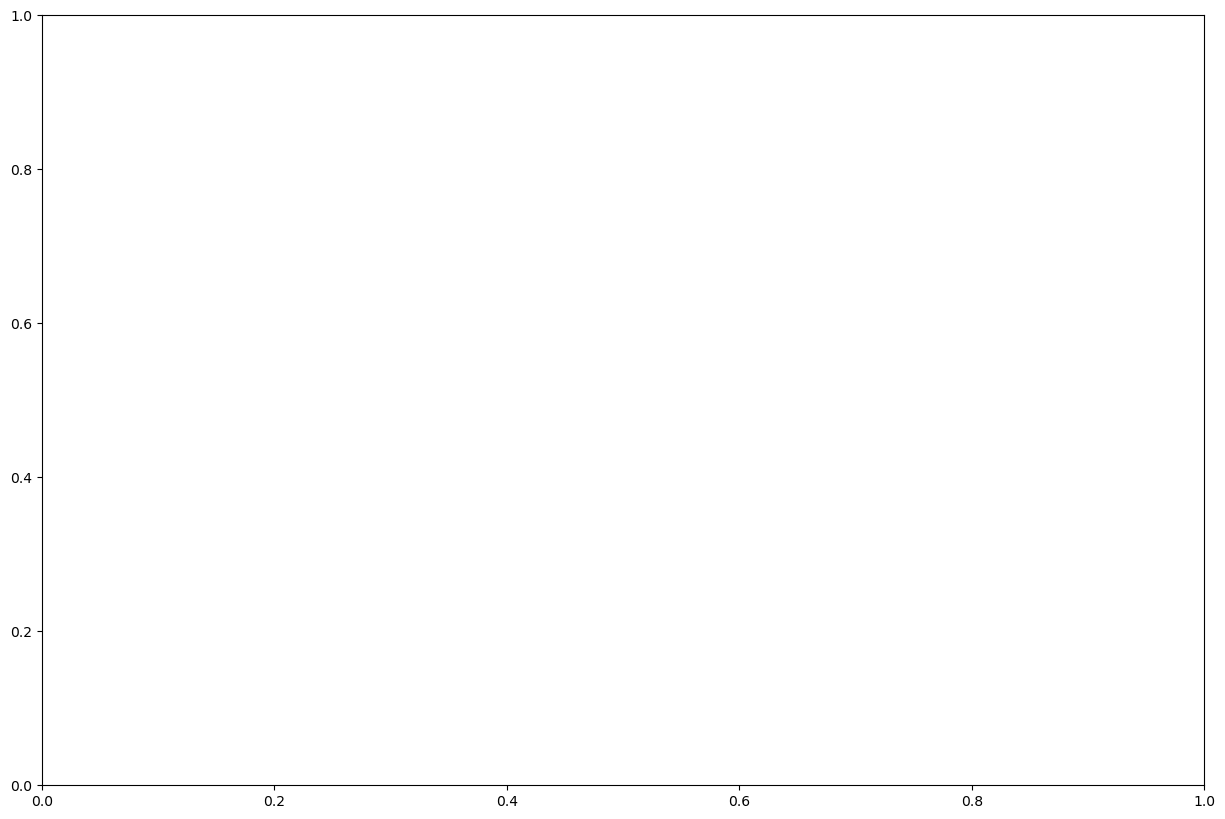

In [74]:
#Checking the Correlation
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)